# First of all let's start with custom layers

# Ready ?
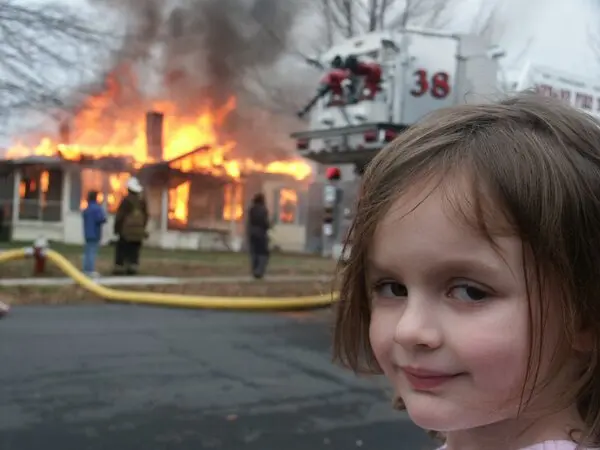

# not transformers yet. First let's have some insights on building custom layers.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential

 <pre> tf.Module <br>
    <pre> └── tf.keras.layers.Layer   (base class for all layers) <br>
      <pre>   └── tf.keras.layers.Dense   (a specific type of Layer)

In [ ]:
# for example subclassing a dense layer and create a custom dense layer
# Dense is a subclass of Layer class
class CustomDenseLayer(tf.keras.layers.Dense):
    def __init__(self, units=32, **kwargs):
        super().__init__(units=units, **kwargs)
        print("Units from parent Dense:", self.units)

custom_dense = CustomDenseLayer(12)

Units from parent Dense: 12


# lets see activations

In [ ]:
tf.keras.activations.get('relu')

<function keras.src.activations.activations.relu(x, negative_slope=0.0, max_value=None, threshold=0.0)>

In [ ]:
tf.keras.activations.get('softmax')

<function keras.src.activations.activations.softmax(x, axis=-1)>

# Let's build a Dense layer using Layer

In [ ]:
class CustomDenseLayer(Layer):
    def __init__(self, units=32):
        super(CustomDenseLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), # weights
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,), # biases
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):  # matmul is matrix multiplication
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)  # activation function is hardcoded as ReLU

In [ ]:
import tensorflow as tf

A = tf.constant([[1, 2],
                 [3, 4]])  # shape (2, 2)

B = tf.constant([[5, 6],
                 [7, 8]])  # shape (2, 2)

C = tf.matmul(A, B)
print(C.numpy())

[[19 22]
 [43 50]]


In [ ]:
from tensorflow.keras.layers import Softmax

# Define the model with Softmax in the output layer
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10),  # Hidden layer with ReLU activation
    Softmax()              # Output layer with Softmax activation for multi-class classification
])  # model can be built like this.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
print("Model summary before building:")
model.summary()

# Build the model to show parameters
model.build((1000, 20))
print("\nModel summary after building:")
model.summary()

Model summary before building:


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer_68           │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_69           │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_2 (Softmax)             │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Model summary after building:


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer_68           │ (1000, 128)            │         2,688 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_69           │ (1000, 10)             │         1,290 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_2 (Softmax)             │ (1000, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

# here are total parameters, trainable params and non-trainable params. Are they similar to parameters in LLMs?

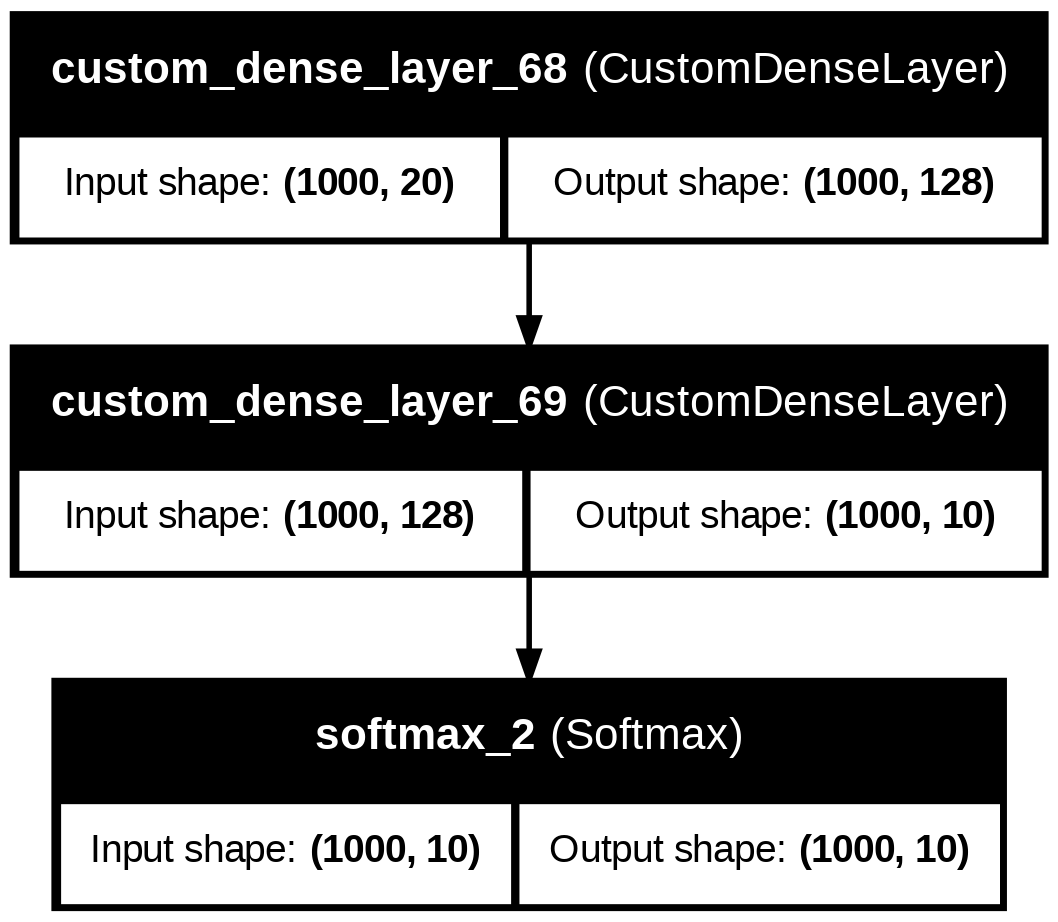

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
import pandas as pd

df_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
df_train.shape

(17000, 9)

In [ ]:
# build a model for predicting house value
model = Sequential([
    CustomDenseLayer(128),      # hidden layer
    CustomDenseLayer(64),       # another hidden layer
    CustomDenseLayer(1)         # output: 1 value (house price), no activation
])

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Features and target
X = df_train.drop(columns=['median_house_value']).to_numpy()
y = df_train['median_house_value'].to_numpy()
print(X)
print(X.shape)
# Fit the model
history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)

[[-114.31     34.19     15.     ... 1015.      472.        1.4936]
 [-114.47     34.4      19.     ... 1129.      463.        1.82  ]
 [-114.56     33.69     17.     ...  333.      117.        1.6509]
 ...
 [-124.3      41.84     17.     ... 1244.      456.        3.0313]
 [-124.3      41.8      19.     ... 1298.      478.        1.9797]
 [-124.35     40.54     52.     ...  806.      270.        3.0147]]
(17000, 8)
Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 38031933440.0000 - mae: 157445.8906 - val_loss: 33672916992.0000 - val_mae: 142708.7656
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22233556992.0000 - mae: 105768.7422 - val_loss: 28432719872.0000 - val_mae: 129187.0938
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17969403904.0000 - mae: 95380.9766 - val_loss: 19277713408.0000 - val_mae: 106602.7109
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11711439872.0000 - mae: 80044.6797 - val_loss: 15246587904.0000 - val_mae: 987

In [ ]:
# Features and target from test set
X_test = df_test.drop(columns=['median_house_value']).to_numpy()
y_test = df_test['median_house_value'].to_numpy()

# Predictions
y_pred = model.predict(X_test)

# Show first few predictions
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test[i]:.2f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predicted: 258613.41, Actual: 344700.00
Predicted: 215797.81, Actual: 176500.00
Predicted: 248282.16, Actual: 270500.00
Predicted: 219112.97, Actual: 330000.00
Predicted: 171567.91, Actual: 81700.00


In [ ]:
import tensorflow as tf

base_row = tf.constant([1, 2, 3], dtype=tf.float32)

# Stack 8 copies along axis 0
my_matrix = tf.stack([base_row]*8, axis=0)
print(my_matrix.shape)  # (8, 3)
#print(my_matrix)

(8, 3)


In [ ]:
mat_mul = tf.matmul(X, my_matrix)
print(mat_mul)

InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:MatMul] name: 

In [ ]:
# Ensure X is float32
X_casted = tf.cast(X, tf.float32)

# Now multiply
mat_mul = tf.matmul(X_casted, my_matrix)
print(mat_mul.shape)
mat_mul

(17000, 3)


<tf.Tensor: shape=(17000, 3), dtype=float32, numpy=
array([[ 8318.373 , 16636.746 , 24955.121 ],
       [11083.751 , 22167.502 , 33251.25  ],
       [ 1281.7808,  2563.5615,  3845.3428],
       ...,
       [ 4845.5713,  9691.143 , 14536.713 ],
       [ 4938.48  ,  9876.96  , 14815.439 ],
       [ 3167.2046,  6334.409 ,  9501.614 ]], dtype=float32)>

# use scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale features
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(df_train.drop(columns=['median_house_value']))
X_test_scaled = X_scaler.transform(df_test.drop(columns=['median_house_value']))

# Scale target (y)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(df_train[['median_house_value']])
y_test_scaled = y_scaler.transform(df_test[['median_house_value']])

y_train_scaled = y_train_scaled.reshape(-1, 1)
y_test_scaled = y_test_scaled.reshape(-1, 1)

# Train model
history = model.fit(X_train_scaled, y_train_scaled, batch_size=32, epochs=50, validation_split=0.2)

# Predictions (scaled)
y_pred_scaled = model.predict(X_test_scaled)

# Convert back to original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Compare first few
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {df_test['median_house_value'].iloc[i]:.2f}")


Epoch 1/50


ValueError: Cannot take the length of shape with unknown rank.

⚠️ Note: .numpy() works only in eager execution mode (default in TF 2.x).


In [ ]:
# --- Custom Dense Layer ---
class CustomDenseLayer(Layer):
    def __init__(self, units, activation='relu'):
        super().__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True
        )
        print(self.w)
        self.b = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        if self.activation is not None:
            return self.activation(z)
        return z



# --- Scale features and target ---
X_train = df_train.drop(columns=['median_house_value']).to_numpy()
y_train = df_train[['median_house_value']].to_numpy()
X_test = df_test.drop(columns=['median_house_value']).to_numpy()
y_test = df_test[['median_house_value']].to_numpy()

# Standardize
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# --- Build model ---
model = Sequential([
    CustomDenseLayer(128, activation='relu'),  # hidden layer
    CustomDenseLayer(64, activation='relu'),   # hidden layer
    CustomDenseLayer(1, activation=None)       # output layer, linear
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- Train model ---
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=32, epochs=10, validation_split=0.2)

# --- Predict and inverse scale ---
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# --- Compare first few predictions ---
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {df_test['median_house_value'].iloc[i]:.2f}")

Epoch 1/10


NotImplementedError: Exception encountered when calling Sequential.call().

[1mnumpy() is only available when eager execution is enabled.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 8), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
# --- Custom Dense Layer ---
class CustomDenseLayer(Layer):
    def __init__(self, units, activation='relu'):
        super().__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        if self.activation is not None:
            return self.activation(z)
        return z


# --- Scale features and target ---
X_train = df_train.drop(columns=['median_house_value']).to_numpy()
y_train = df_train[['median_house_value']].to_numpy()
X_test = df_test.drop(columns=['median_house_value']).to_numpy()
y_test = df_test[['median_house_value']].to_numpy()

# Standardize
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# --- Build model ---
model = Sequential([
    CustomDenseLayer(128, activation='relu'),  # hidden layer
    CustomDenseLayer(64, activation='relu'),   # hidden layer
    CustomDenseLayer(1, activation=None)       # output layer, linear
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- Train model ---
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=32, epochs=10, validation_split=0.2)

# --- Predict and inverse scale ---
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# --- Compare first few predictions ---
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {df_test['median_house_value'].iloc[i]:.2f}")

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4026 - mae: 0.4585 - val_loss: 0.4786 - val_mae: 0.4976
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2431 - mae: 0.3521 - val_loss: 0.4671 - val_mae: 0.5178
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2309 - mae: 0.3359 - val_loss: 0.4919 - val_mae: 0.5406
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2197 - mae: 0.3245 - val_loss: 0.4817 - val_mae: 0.5603
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2208 - mae: 0.3247 - val_loss: 0.4533 - val_mae: 0.5281
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2132 - mae: 0.3177 - val_loss: 0.4437 - val_mae: 0.5287
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2078 - mae: 0.3124 - val_loss: 0.4428 - val_mae: 0.5285
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2150 - mae: 0.3156 - val_loss: 0.4107 - val_mae: 0.5008
Epoch 9/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

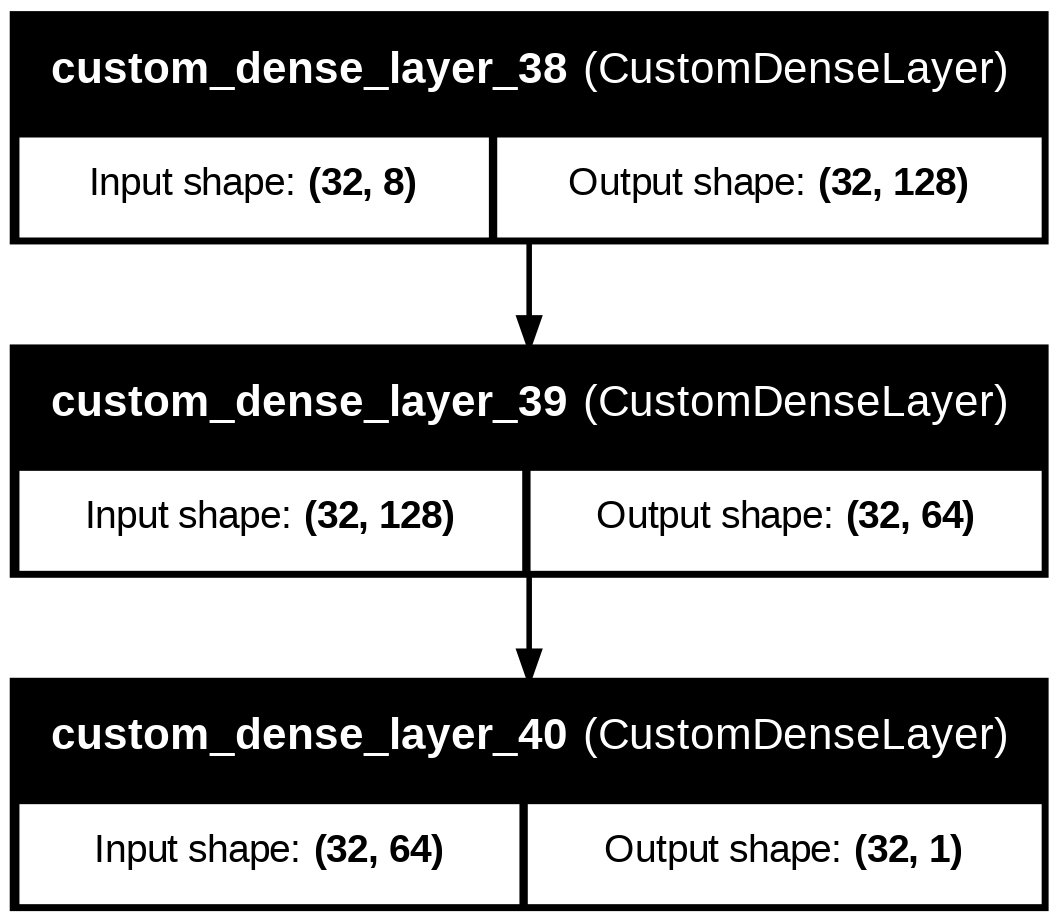

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# After training
for i, layer in enumerate(model.layers):
    if isinstance(layer, CustomDenseLayer):
        #print(f"Layer {i} weights (w):\n{layer.w.numpy()}\n | num weights", len(layer.w.numpy()), ' | num weights in ', len(layer.w[0].numpy()))
        #print(f"Layer {i} biases (b):\n{layer.b.numpy()}\n | num biases, " ,len(layer.b.numpy()))
        print(f"Layer {i} | num weights", len(layer.w.numpy()), ' | num weights in ', len(layer.w[0].numpy()))
        print(f"Layer {i} | num biases, " ,len(layer.b.numpy()))

Layer 0 | num weights 8  | num weights in  128
Layer 0 | num biases,  128
Layer 1 | num weights 128  | num weights in  64
Layer 1 | num biases,  64
Layer 2 | num weights 64  | num weights in  1
Layer 2 | num biases,  1


In [ ]:
# After training
for i, layer in enumerate(model.layers):
    if isinstance(layer, CustomDenseLayer):
        #print(f"Layer {i} weights (w):\n{layer.w.numpy()}\n | num weights", len(layer.w.numpy()), ' | num weights in ', len(layer.w[0].numpy()))
        #print(f"Layer {i} biases (b):\n{layer.b.numpy()}\n | num biases, " ,len(layer.b.numpy()))
        print(f"Layer {i} | weights shape", layer.w.numpy().shape)
        print(f"Layer {i} | biases shape, " , layer.b.numpy().shape)

Layer 0 | weights shape (8, 128)
Layer 0 | biases shape,  (128,)
Layer 1 | weights shape (128, 64)
Layer 1 | biases shape,  (64,)
Layer 2 | weights shape (64, 1)
Layer 2 | biases shape,  (1,)


In [ ]:
print('Layer are fully connected.')
# Number of input features
print("Number of input features (input nodes):", X_train.shape[1])

# First hidden layer
print("First hidden layer nodes:", 128)
print("Weights shape (input -> first layer):", model.layers[0].w.numpy().shape)
print("Explanation: For each of the 8 input nodes, there is a weight to each of the 128 neurons.")

# Second hidden layer
print("Second hidden layer nodes:", 64)
print("Weights shape (first layer -> second layer):", model.layers[1].w.numpy().shape)
print("Explanation: For each of the 128 neurons in first layer, there is a weight to each of the 64 neurons.")

# Output layer
print("Output layer nodes:", 1)
print("Weights shape (second layer -> output):", model.layers[2].w.numpy().shape)
print("Explanation: For each of the 64 neurons in second layer, there is a weight to the 1 output neuron.")


Layer are fully connected.
Number of input features (input nodes): 8
First hidden layer nodes: 128
Weights shape (input -> first layer): (8, 128)
Explanation: For each of the 8 input nodes, there is a weight to each of the 128 neurons.
Second hidden layer nodes: 64
Weights shape (first layer -> second layer): (128, 64)
Explanation: For each of the 128 neurons in first layer, there is a weight to each of the 64 neurons.
Output layer nodes: 1
Weights shape (second layer -> output): (64, 1)
Explanation: For each of the 64 neurons in second layer, there is a weight to the 1 output neuron.


In [ ]:
from tensorflow.keras.layers import Dense

# --- Build model ---
model = Sequential([
    Dense(128, activation='relu'),  # hidden layer
    Dense(64, activation='relu'),   # hidden layer
    Dense(1, activation=None)       # output layer, linear
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- Train model ---
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=32, epochs=10, validation_split=0.2)

# --- Predict and inverse scale ---
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# --- Compare first few predictions ---
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {df_test['median_house_value'].iloc[i]:.2f}")

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4003 - mae: 0.4519 - val_loss: 0.4096 - val_mae: 0.4809
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2573 - mae: 0.3567 - val_loss: 0.4798 - val_mae: 0.4968
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2401 - mae: 0.3414 - val_loss: 0.4389 - val_mae: 0.4778
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2284 - mae: 0.3322 - val_loss: 0.3891 - val_mae: 0.4693
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2199 - mae: 0.3259 - val_loss: 0.4341 - val_mae: 0.5044
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2106 - mae: 0.3184 - val_loss: 0.4354 - val_mae: 0.5226
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2063 - mae: 0.3158 - val_loss: 0.4546 - val_mae: 0.5281
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2143 - mae: 0.3205 - val_loss: 0.4305 - val_mae: 0.5124
Epoch 9/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4057 - mae: 0.4587 - val_loss: 0.4220 - val_mae: 0.4917 <br>
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2513 - mae: 0.3537 - val_loss: 0.3762 - val_mae: 0.4709 <br>
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2274 - mae: 0.3363 - val_loss: 0.4653 - val_mae: 0.5049 <br>
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2287 - mae: 0.3304 - val_loss: 0.4304 - val_mae: 0.5081 <br>
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2149 - mae: 0.3209 - val_loss: 0.4222 - val_mae: 0.4908 <br>
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2159 - mae: 0.3221 - val_loss: 0.4130 - val_mae: 0.4765 <br>
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1970 - mae: 0.3061 - val_loss: 0.4497 - val_mae: 0.5343 <br>
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1996 - mae: 0.3090 - val_loss: 0.4054 - val_mae: 0.4778 <br>
Epoch 9/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2006 - mae: 0.3061 - val_loss: 0.4592 - val_mae: 0.5276 <br>
Epoch 10/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1944 - mae: 0.3055 - val_loss: 0.4484 - val_mae: 0.5004 <br>
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   <br>
Predicted: 386006.06, Actual: 344700.00<br>
Predicted: 167167.69, Actual: 176500.00<br>
Predicted: 278628.06, Actual: 270500.00<br>
Predicted: 292211.28, Actual: 330000.00<br>
Predicted: 74246.24, Actual: 81700.00

| Feature               | `CustomDenseLayer`                         | `tf.keras.layers.Dense`                                                            |
| --------------------- | ------------------------------------------ | ---------------------------------------------------------------------------------- |
| Weight initialization | You used `glorot_uniform` manually         | Dense defaults to `glorot_uniform` but can be changed via `kernel_initializer`     |
| Bias initialization   | `zeros`                                    | Same, but can be changed via `bias_initializer`                                    |
| Flexibility           | You manually implement `call()`            | Dense has highly optimized C++/CUDA backend, faster                                |
| Features              | Only basic forward pass                    | Supports `activity_regularizer`, `use_bias=True/False`, `dtype`, `trainable`, etc. |
| Serialization         | You have to manually handle saving/loading | Dense can be saved/loaded automatically with the model (`model.save()`)            |
| GPU optimization      | Manual ops                                 | Dense is optimized for GPU/TPU                                                     |


In [ ]:
z = [[-1, 2], [3, -4]]
activation = tf.nn.relu
activation(z)  # [[0, 2], [3, 0]]


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 2],
       [3, 0]], dtype=int32)>

# Let's f. with the model

In [ ]:
# --- Custom Dense Layer ---
class CustomDenseLayer(Layer):
    def __init__(self, units, activation='relu'):
        super().__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + 3*self.b
        if self.activation is not None:
            return self.activation(z)
        return z


# --- Scale features and target ---
X_train = df_train.drop(columns=['median_house_value']).to_numpy()
y_train = df_train[['median_house_value']].to_numpy()
X_test = df_test.drop(columns=['median_house_value']).to_numpy()
y_test = df_test[['median_house_value']].to_numpy()

# Standardize
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# --- Build model ---
model = Sequential([
    CustomDenseLayer(128, activation='relu'),  # hidden layer
    CustomDenseLayer(64, activation='relu'),   # hidden layer
    CustomDenseLayer(1, activation=None)       # output layer, linear
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- Train model ---
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=32, epochs=10, validation_split=0.2)

# --- Predict and inverse scale ---
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# --- Compare first few predictions ---
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {df_test['median_house_value'].iloc[i]:.2f}")


Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4005 - mae: 0.4544 - val_loss: 0.4465 - val_mae: 0.5018
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2485 - mae: 0.3490 - val_loss: 0.4146 - val_mae: 0.5013
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2268 - mae: 0.3326 - val_loss: 0.4119 - val_mae: 0.5110
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2208 - mae: 0.3242 - val_loss: 0.4795 - val_mae: 0.5323
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2162 - mae: 0.3220 - val_loss: 0.4255 - val_mae: 0.4924
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2095 - mae: 0.3153 - val_loss: 0.4052 - val_mae: 0.5091
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2069 - mae: 0.3135 - val_loss: 0.3770 - val_mae: 0.4656
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1987 - mae: 0.3061 - val_loss: 0.4083 - val_mae: 0.5023
Epoch 9/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

# wow got even better!

In [ ]:
# --- Custom Dense Layer ---
class CustomDenseLayer(Layer):
    def __init__(self, units, activation='relu'):
        super().__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + 10000*self.b
        if self.activation is not None:
            return self.activation(z)
        return z


# --- Build model ---
model = Sequential([
    CustomDenseLayer(128, activation='relu'),  # hidden layer
    CustomDenseLayer(64, activation='relu'),   # hidden layer
    CustomDenseLayer(1, activation=None)       # output layer, linear
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- Train model ---
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=32, epochs=10, validation_split=0.2)

# --- Predict and inverse scale ---
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# --- Compare first few predictions ---
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {df_test['median_house_value'].iloc[i]:.2f}")


Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 71.5208 - mae: 4.0333 - val_loss: 0.6853 - val_mae: 0.6277
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7045 - mae: 0.6496 - val_loss: 1.0032 - val_mae: 0.7525
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4292 - mae: 0.9702 - val_loss: 3.6632 - val_mae: 1.7789
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3423 - mae: 1.2143 - val_loss: 4.0100 - val_mae: 1.8729
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.0110 - mae: 1.1453 - val_loss: 0.6577 - val_mae: 0.5903
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2790 - mae: 0.9035 - val_loss: 0.7293 - val_mae: 0.7337
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7601 - mae: 1.0716 - val_loss: 1.4832 - val_mae: 1.0886
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7584 - mae: 1.0350 - val_loss: 0.9546 - val_mae: 0.7248
Epoch 9/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - l

# wow converges real fast!!!!

In [ ]:
# --- Custom Dense Layer ---
class CustomDenseLayer(Layer):
    def __init__(self, units, activation='relu'):
        super().__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + 10000*self.b
        if self.activation is not None:
            return self.activation(z)
        return z


# --- Build model ---
model = Sequential([
    CustomDenseLayer(128, activation='relu'),  # hidden layer
    CustomDenseLayer(64, activation='relu'),   # hidden layer
    CustomDenseLayer(1, activation=None)       # output layer, linear
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- Train model ---
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=32, epochs=20, validation_split=0.2)

# --- Predict and inverse scale ---
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# --- Compare first few predictions ---
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {df_test['median_house_value'].iloc[i]:.2f}")


Epoch 1/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 84.0574 - mae: 4.2206 - val_loss: 1.3411 - val_mae: 0.8797
Epoch 2/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6114 - mae: 0.5989 - val_loss: 2.0760 - val_mae: 1.2558
Epoch 3/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9253 - mae: 0.7545 - val_loss: 0.4876 - val_mae: 0.5274
Epoch 4/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2239 - mae: 0.8664 - val_loss: 1.9639 - val_mae: 1.2263
Epoch 5/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5092 - mae: 0.9690 - val_loss: 0.5405 - val_mae: 0.6117
Epoch 6/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8317 - mae: 1.0718 - val_loss: 1.6919 - val_mae: 1.0926
Epoch 7/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3227 - mae: 0.9250 - val_loss: 0.8617 - val_mae: 0.6857
Epoch 8/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0319 - mae: 1.1370 - val_loss: 1.3466 - val_mae: 1.0342
Epoch 9/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - l

# let's dont use bias

In [ ]:
# --- Custom Dense Layer ---
class CustomDenseLayer(Layer):
    def __init__(self, units, activation='relu'):
        super().__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )

    def call(self, inputs):
        z = tf.matmul(inputs, self.w)
        if self.activation is not None:
            return self.activation(z)
        return z

# --- Build model ---
model = Sequential([
    CustomDenseLayer(128, activation='relu'),  # hidden layer
    CustomDenseLayer(64, activation='relu'),   # hidden layer
    CustomDenseLayer(1, activation=None)       # output layer, linear
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- Train model ---
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=32, epochs=10, validation_split=0.2)

# --- Predict and inverse scale ---
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# --- Compare first few predictions ---
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {df_test['median_house_value'].iloc[i]:.2f}")


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['sequential_21/custom_dense_layer_62/variable_96', 'sequential_21/custom_dense_layer_63/variable_98', 'sequential_21/custom_dense_layer_64/variable_100'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4023 - mae: 0.4604 - val_loss: 0.4955 - val_mae: 0.5060
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2644 - mae: 0.3663 - val_loss: 0.4110 - val_mae: 0.4570
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2517 - mae: 0.3535 - val_loss: 0.4061 - val_mae: 0.4644
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2372 - mae: 0.3441 - val_loss: 0.3970 - val_mae: 0.4531
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2390 - mae: 0.3425 - val_loss: 0.4175 - val_mae: 0.4810
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2247 - mae: 0.3348 - val_loss: 0.4674 - val_mae: 0.4907
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2235 - mae: 0.3333 - val_loss: 0.3933 - val_mae: 0.4688
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2244 - mae: 0.3337 - val_loss: 0.3645 - val_mae: 0.4531
Epoch 9/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2209 

# nice again even without bias!

# let's try 10x weights

In [ ]:
# --- Custom Dense Layer ---
class CustomDenseLayer(Layer):
    def __init__(self, units, activation='relu'):
        super().__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )

    def call(self, inputs):
        z = tf.matmul(inputs, 10*self.w) + self.b
        if self.activation is not None:
            return self.activation(z)
        return z

# --- Build model ---
model = Sequential([
    CustomDenseLayer(128, activation='relu'),  # hidden layer
    CustomDenseLayer(64, activation='relu'),   # hidden layer
    CustomDenseLayer(1, activation=None)       # output layer, linear
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- Train model ---
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=32, epochs=10, validation_split=0.2)

# --- Predict and inverse scale ---
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# --- Compare first few predictions ---
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {df_test['median_house_value'].iloc[i]:.2f}")


Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2309.5847 - mae: 27.2049 - val_loss: 419.0938 - val_mae: 15.1607
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 857.4775 - mae: 14.0765 - val_loss: 298.0049 - val_mae: 10.9534
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 196.6356 - mae: 8.4203 - val_loss: 327.5056 - val_mae: 14.6031
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 83.3268 - mae: 6.1522 - val_loss: 444.3892 - val_mae: 15.3980
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 257.4885 - mae: 8.2240 - val_loss: 158.5037 - val_mae: 9.3717
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 68.8442 - mae: 5.2555 - val_loss: 67.1756 - val_mae: 6.1099
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.4856 - mae: 3.5213 - val_loss: 158.9187 - val_mae: 7.6754
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 90.0632 - mae: 4.4286 - val_loss: 65.9736 - val_mae: 6.1109
Epoch 9/10
425/425 ━━━━

# disasterous
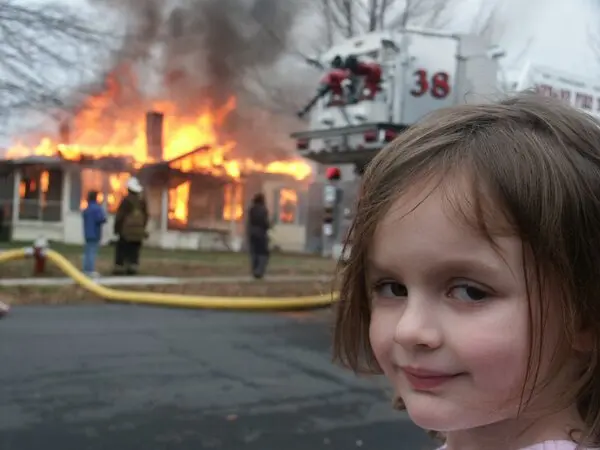

In [ ]:
# --- Custom Dense Layer ---
class CustomDenseLayer(Layer):
    def __init__(self, units, activation='relu'):
        super().__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        if self.activation is not None:
            return self.activation(z)
        return z

2️⃣ Backpropagation (backward pass)

You don’t see it in your code, but TensorFlow tracks all operations automatically (because of autodiff / GradientTape).

During model.fit(...), TensorFlow computes:

Forward pass (your call) to get predictions.

Loss using loss=y_true - y_pred.

Backward pass automatically: computes gradients of loss w.r.t w and b.

Updates weights via the optimizer (Adam in your case).

# Finally! Lets start transformers

# self attention components
* enables each input word to attend to every other word
* captures context and relationships

# each word is represented by 3 vectors
* Query
* Key
* Value

# Attention score is dot product of Query and Key vectors
* Query ⋅ Key


###  Used to weight the value vectors
